# Hampel filter

Hampel filter experiments. The Hampel filter is useful for removing local outliers from time series data, and replacing them with reasonable values.

For more information, see

- https://exploringdatablog.blogspot.com/2011/11/cleaning-time-series-and-other-data.html
- https://exploringdatablog.blogspot.com/2012/01/moving-window-filters-and-pracma.html

## 0 Setup

In [64]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load("forecast", "pracma", "TSA")

library(forecast)
library(pracma)
library(TSA)


## 1 Exploratory data analysis

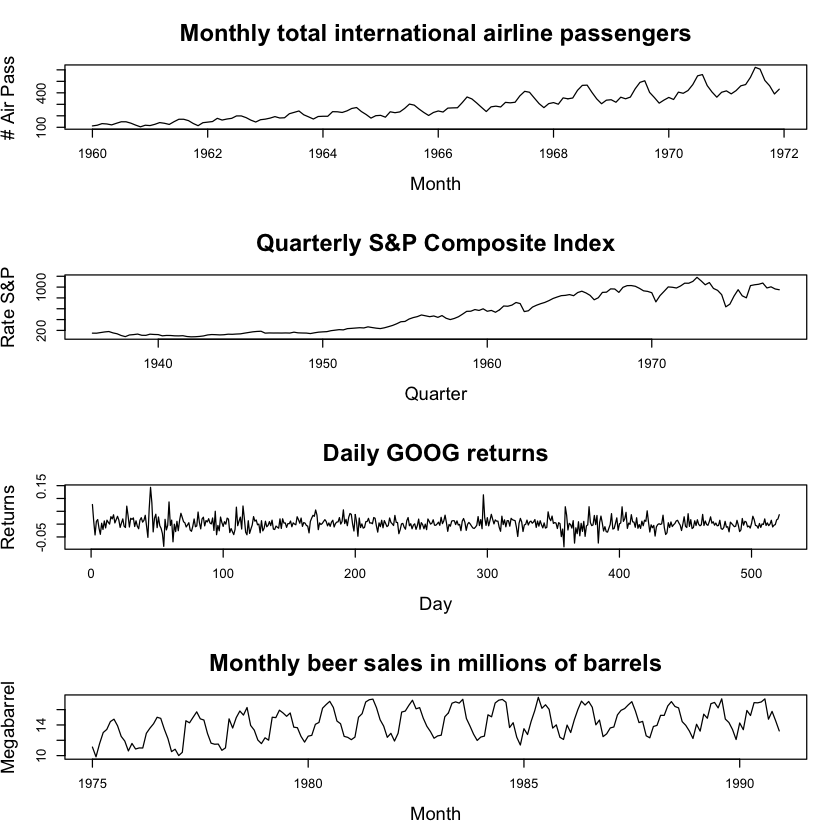

In [4]:
data(list = c("airpass", "SP", "google", "beersales"))
par(mfrow = c(4, 1), cex.main = 1.8, cex.lab = 1.4)
plot(airpass, main = "Monthly total international airline passengers", xlab = "Month", ylab = "# Air Pass")
plot(SP, main = "Quarterly S&P Composite Index", xlab = "Quarter", ylab = "Rate S&P")
plot(google, main = "Daily GOOG returns", xlab = "Day", ylab = "Returns")
plot(beersales, main = "Monthly beer sales in millions of barrels", xlab = "Month", ylab = "Megabarrel")

| Dataset | Trend? | Seasonality? |
| ------- | ------ | ------------ |
| airpass | Yes | Yes |
| SP | Yes | No |
| google | No | No |
| beer | No | Yes |


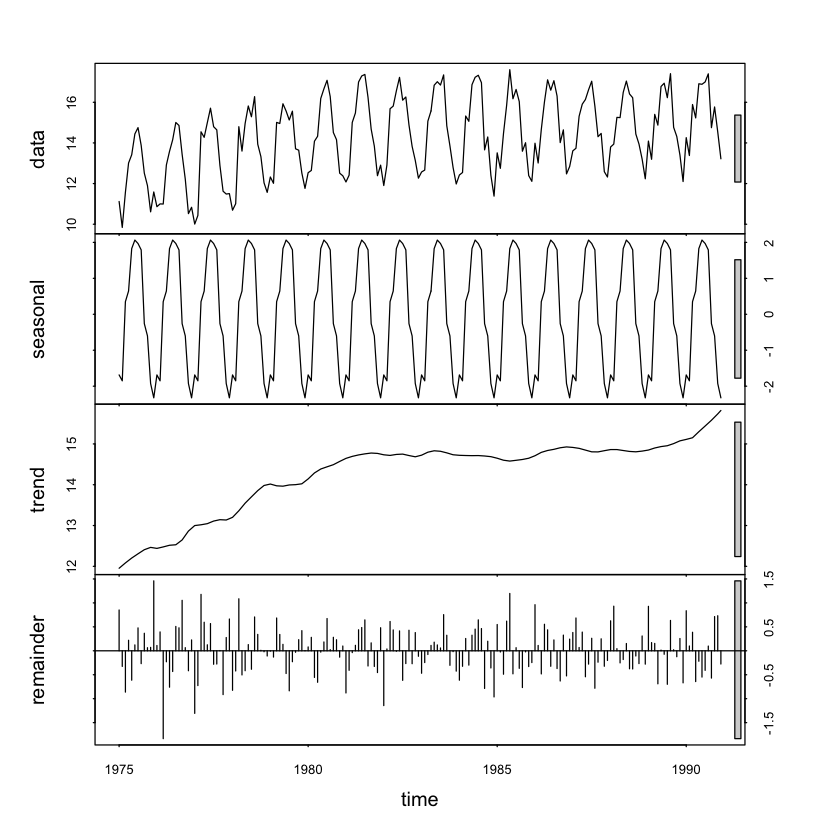

In [6]:
# beersales STL
beersales.stl <- stl(beersales, s.window = "periodic")
plot(beersales.stl)


## 2 Create anomalies

In [138]:
times <- as.numeric(time(beersales))
times.anomaly <- c(times[10], times[33], times[61], times[102])

data.anomaly <- beersales
data.anomaly[10] <- 0
data.anomaly[33] <- 0
data.anomaly[61] <- 0
data.anomaly[102] <- 0

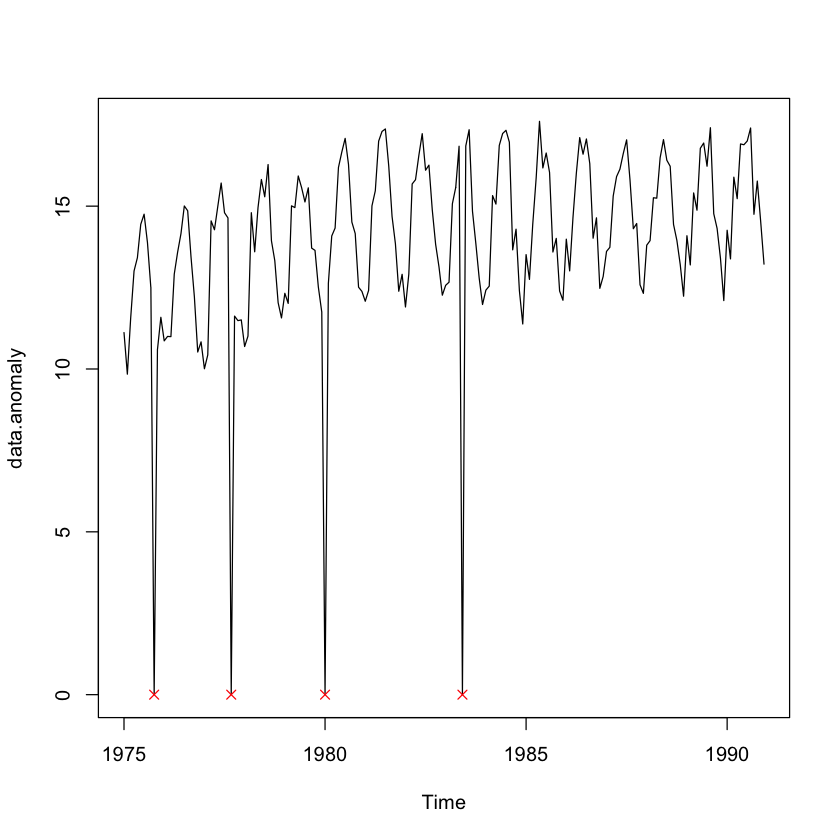

In [140]:
plot(data.anomaly)
points(times.anomaly, c(data.anomaly[10], data.anomaly[33], data.anomaly[61], data.anomaly[102]), pch=4, col="red")

## 3 Replace anomalies

In [178]:
data.hampel <- hampel(data.anomaly, 9, 3)

In [179]:
data.hampel$ind

[1]  10  33  61 102

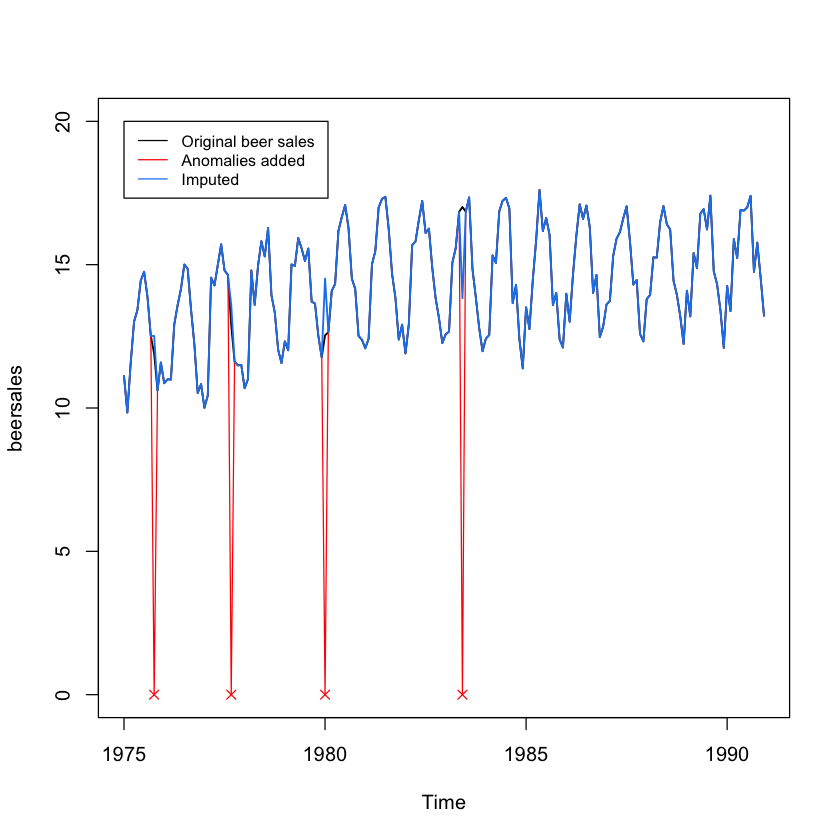

In [180]:
plot(beersales, ylim=c(0, 20), type="l", lwd=1.5, col="black")
lines(data.anomaly, col="red")
points(times.anomaly, c(data.anomaly[10], data.anomaly[33], data.anomaly[61], data.anomaly[102]), pch=4, col="red")
lines(x=times, y=data.hampel$y, lwd=1.5, col="dodgerblue2")
legend(1975, 20, legend=c("Original beer sales", "Anomalies added", "Imputed"),
       col=c("black", "red", "dodgerblue2"), lty=1:1:1, cex=0.8)